In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head() 
# passengerid, name, sex, tickit, cabin, embarked
# survival:    Survival 
# PassengerId: Unique Id of a passenger. 
# pclass:    Ticket class     
# sex:    Sex     
# Age:    Age in years     
# sibsp:    # of siblings / spouses aboard the Titanic     
# parch:    # of parents / children aboard the Titanic     
# ticket:    Ticket number     
# fare:    Passenger fare     
# cabin:    Cabin number     
# embarked:    Port of Embarkation
# dont need: PassengerId, Ticket, Cabin,
# cols we need: Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()
# age, cabin, embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# dont need: PassengerId, Ticket, Cabin,
# cols we need: ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# cols = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']
train.pivot_table('Survived', columns='Pclass')

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

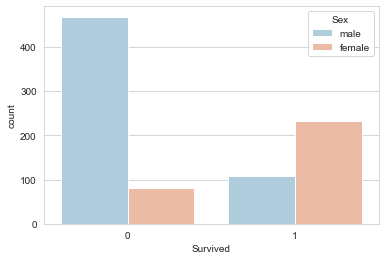

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
# sex is a very good attribute

<AxesSubplot:xlabel='Survived', ylabel='count'>

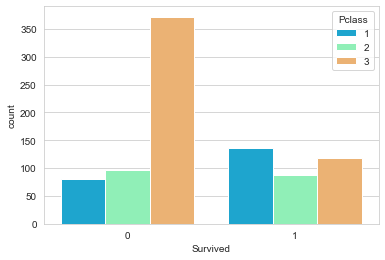

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
# class is a good attribute

<AxesSubplot:>

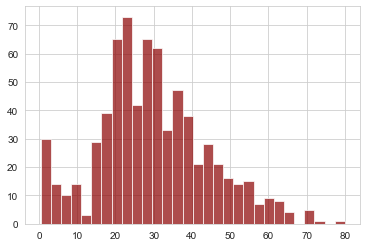

In [10]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)


<AxesSubplot:>

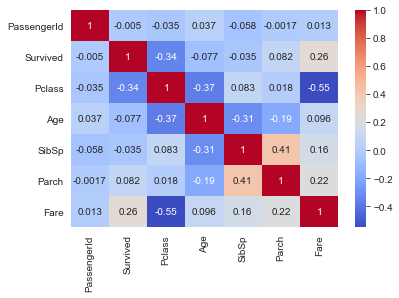

In [11]:
sns.heatmap(train.corr(), annot=True, cmap= 'coolwarm' )
# pclass, fare /Good
# age, sibsp, parch /Bad

<AxesSubplot:xlabel='SibSp', ylabel='count'>

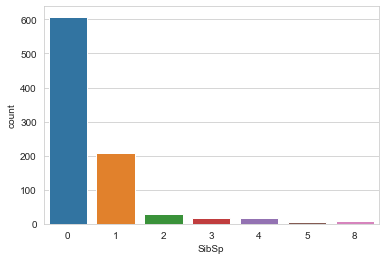

In [12]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

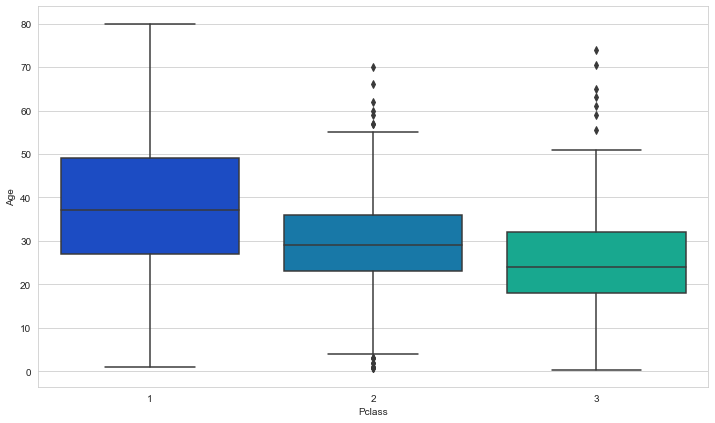

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [14]:
train.drop('Cabin',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)
train.drop('Name',axis=1,inplace=True)
# no need: PassengerId, Ticket, Cabin, Nama

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
train.dropna(inplace=True)

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [19]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [20]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [22]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [23]:
train = pd.concat([train,sex,embark],axis=1)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
q1_age, q3_age = train['Age'].quantile([0.25, 0.75])
iqr_age = q3_age-q1_age
q1_fare, q3_fare = train['Fare'].quantile([0.25, 0.75])
iqr_fare = q3_fare-q1_fare

In [26]:
train = train[
    (train['Age']>(q1_age-1.5*iqr_age))
    &(train['Age']<(q3_age+1.5*iqr_age))
    &(train['Fare']>(q1_fare-1.5*iqr_fare))
    &(train['Fare']<(q3_fare+1.5*iqr_fare))]

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train = scaler.fit_transform(train)

In [28]:
Train = pd.DataFrame(Train)

In [29]:
Train.head()

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.339415,0.2,0.0,0.104618,1.0,0.0,1.0
1,1.0,1.0,0.402328,0.0,0.0,0.114358,0.0,0.0,1.0
2,1.0,0.0,0.543882,0.2,0.0,0.766234,0.0,0.0,1.0
3,0.0,1.0,0.543882,0.0,0.0,0.116162,1.0,0.0,1.0
4,0.0,0.0,0.842718,0.0,0.0,0.748377,1.0,0.0,1.0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train.drop(0,axis=1), 
                                                    Train[0], test_size=0.30, 
                                                    random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       115
         1.0       0.78      0.59      0.67        68

    accuracy                           0.79       183
   macro avg       0.79      0.75      0.76       183
weighted avg       0.79      0.79      0.78       183



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=(1,0))

array([[ 40,  28],
       [ 11, 104]], dtype=int64)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84       115
         1.0       0.83      0.51      0.64        68

    accuracy                           0.78       183
   macro avg       0.80      0.73      0.74       183
weighted avg       0.79      0.78      0.77       183



In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=(1,0))

array([[ 35,  33],
       [  7, 108]], dtype=int64)

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

predictions = tree.predict(X_test)


print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       115
         1.0       0.67      0.66      0.67        68

    accuracy                           0.75       183
   macro avg       0.74      0.74      0.74       183
weighted avg       0.75      0.75      0.75       183



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=(1,0))

array([[45, 23],
       [22, 93]], dtype=int64)

In [41]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)

predictions = randomForest.predict(X_test)


print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       115
         1.0       0.76      0.54      0.63        68

    accuracy                           0.77       183
   macro avg       0.76      0.72      0.73       183
weighted avg       0.76      0.77      0.75       183



In [42]:
confusion_matrix(y_test, predictions, labels=(1,0))

array([[ 37,  31],
       [ 12, 103]], dtype=int64)